# 미분방정식

## Euler's method

오일러 방법은 미분방정식을 수치적으로 푸는 가장 간단한 방법이다. 우선 테일러 전개를 이용하여 주어진 함수 $f(x)$를 전개하자.
$$x(t+\delta t) = f(t) + \delta t \frac{dx}{dt} +\frac{1}{2} \delta t^2 \frac{d^2 x}{dt^2} + \cdots. $$
$\delta t$가 충분히 작다고 가정하면 $\delta t^2$ 이상의 항들을 무시할 수 있다. 따라서 최종적으로 
$$x(t+\delta t) \approx x(t) + \delta t \frac{dx}{dt}. $$
이 방법을 이용하여 잘 알려진 문제를 해결해보자.  

따라서 오일러 방법은 구체적으로 다음처럼 적용하면 된다.
다음과 같이 주어진 미분방정식에 대해서
$$\frac{dx}{dt} = f(x,t),$$
작은 $dt$에 대해
$$x \rightarrow x + f(x,t) dt $$
를 반복적으로 계산하면 된다.

### (damped) Harmonic Oscillator
하모닉 오실레이터의 운동방정식이 다음처럼 주어진다.(고전역학 교과서 참조)
$$ \frac{d^2 x}{dt^2} + 2 \beta \frac{dx}{dt} + w^2 x = 0. $$ 
이 2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.
$$ \frac{dx}{dt} = v, \\
\frac{d v}{dt} = - 2 \beta v - w^2 x. $$ 
초기에 물체가 $x_0=1$, $v_0=0$인 상태에 존재했다고 하고, $\beta=0.1$, $w=1$을 가정하고 운동을 구해보자.

In [73]:
# delta(dt)가 충분히 작아야 한다는 것을 명심하자.
import numpy as np
beta, w = 0.1, 1
dt=0.001
t = np.arange(0,100,dt)
x , v = np.array([]), np.array([])
x0, v0 = 1, 0

for i in t:
    x0 = x0 + dt*v0
    v0 = v0 - dt*2*beta*v0-dt*w*x0
    x=np.append(x,x0)
    v=np.append(v,v0)

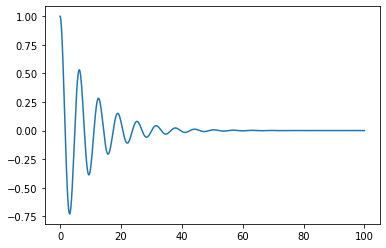

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t,x)

# Runge-Kutta method

오일러 방법을 개선한 방법으로 보편적으로 가장 많이 쓰이는 미분방정식의 수치적 풀이법이다. 오일러 방법이 $\delta t^2$이상의 항들을 무시하는 근사법이었다. 이 정확도를 개선한 것이 룬게-쿠타 방법이다. 2차 룬게-쿠타 방법을 살펴보자. 룬게-쿠타 방법의 핵심은 $x(t)$를 알 때 $x(t+\delta t)$를 구하기 위해 $x(t)$에서의 기울기가 아닌 $x(t+\frac{1}{2}\delta t)$에서의 기울기를 이용하는 것이다. 자세히 살펴보면,

$$x(t+ \delta t) = x(t+\frac{1}{2} \delta t) + \frac{1}{2} \delta t \left( \frac{dx}{dt} \right)_{t=t+\frac{1}{2}\delta t} + \frac{1}{8} \delta t^2 \left( \frac{d^2 x}{dt^2} \right)+ \cdots $$
$$x(t) = x(t+\frac{1}{2} \delta t) - \frac{1}{2} \delta t \left( \frac{dx}{dt} \right)_{t=t+\frac{1}{2}\delta t} + \frac{1}{8} \delta t^2 \left( \frac{d^2 x}{dt^2} \right) + \cdots $$
두 식을 빼면 
$$x(t+ \delta t) \approx x(t)+ \delta t \left( \frac{dx}{dt} \right)_{t=t+\frac{1}{2}\delta t} $$
이 되며 $\delta t^2$ 항이 소거되어 오차는 $\delta t^3$에 비례하게 된다. 이러한 방식으로 다양한 점에서 기울기를 구해서 미분방정식의 근사적 해를 구하면 $\delta t^n$까지 순서대로 소거할 수 있다.이러한 방법을 $n$차 룬게-쿠타 방법이라고 한다. 차수가 높아질 수록 정확해지지만 그만큼 느려진다. 대개는 4차 혹은 경우에 따라서는 2차 룬게-쿠타 방법을 많이 사용한다.

구체적인 2차 룬게-쿠타 방법은 다음과 같다. 다음과 같은 미분방정식이 있다.
$$\frac{dx}{dt} = f(x,t).$$
그러면 다음의 값을 구하고 $x$의 값을 반복적으로 계산한다.
$$ k_1 = \delta t f(x,t), \\
k_2 = \delta t f(x+\frac{1}{2} k_1, t+\frac{1}{2}\delta t), \\
x\rightarrow x+k_2.$$

2차 룬게-쿠타 방법으로 다음의 미분방정식을 풀어보자.
$$ \frac{dx}{dt} = a\sin(t) -x^3 $$

In [146]:
dt=0.1
t = np.arange(0,10,dt)
rkx = np.array([])
eux = np.array([])
x0, xe =1, 1
a = 2

def f(x0,t0,a):
    return a*np.sin(t0)-x0**3

for t0 in t:
    k1 = dt*f(x0,t0,a)
    k2 = dt*f(x0+0.5*k1,t0+0.5*dt,a)
    x0 = x0+k2
    xe = xe+dt*(a*np.sin(t0)-xe**3)
    rkx = np.append(rkx,x0)
    eux = np.append(eux,xe)

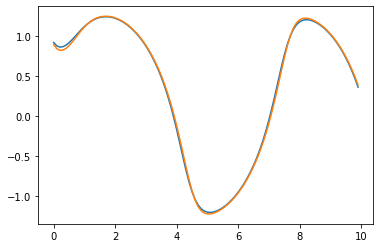

In [147]:
plt.plot(t,rkx,t,eux);

# scipy.integrate.odeint
Solving ordinary differential equations (initial value problems)

In [157]:
from scipy.integrate import odeint
def f(x0,t0,a):
    return a*np.sin(t0)-x0**3
a=2 
xi=1
t = np.arange(0,10,dt)
sol = odeint(f, xi, t, args=(a,))

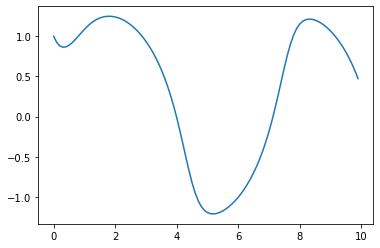

In [162]:
plt.plot(t,sol)

# Simple Harmonic Oscillator

다음은 조화진동자의 운동방정식이다.
$$ \frac{d^2 x}{dt^2} +  w^2 x = 0. $$ 
이 2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.
$$ \frac{dx}{dt} = v, \\
\frac{d v}{dt} = - w^2 x. $$ 

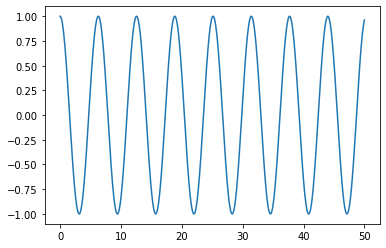

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

w=1
state0 = [1.0, 0.0]
t = np.arange(0.0, 50.0, 0.01)

def f(state, t):
    x, v = state 
    return v, -w**2*x # derivatives

states = odeint(f, state0, t)
plt.plot(t,states[:,0])

## (damped) Simple Harmonic Oscillator

다음은 조화진동자의 운동방정식이다.
$$ \frac{d^2 x}{dt^2} + b \frac{d x}{dt}+ w^2 x = 0. $$ 
이 2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.
$$ \frac{dx}{dt} = v, \\
\frac{d v}{dt} = -b v - w^2 x. $$ 

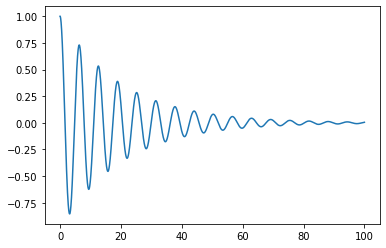

In [22]:
b, w=0.1, 1
state0 = [1.0, 0.0]
t = np.arange(0.0, 100.0, 0.01)

def f(state, t):
    x, v = state 
    return v, -b*v-w**2*x # derivatives

states = odeint(f, state0, t)
plt.plot(t,states[:,0])